In [12]:
# 10 different classes
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ghnshymsaini/cifar-10-image-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'cifar-10-image-dataset' dataset.
Path to dataset files: /kaggle/input/cifar-10-image-dataset


In [13]:
# =========================
# 2) Load CIFAR-10 directly
# =========================
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize images (0–255 -> 0–1):Scalling
#Images are pixels from 0 to 255. Dividing by 255 makes them from 0 to 1

X_train = X_train / 255.0
X_test  = X_test / 255.0

In [14]:
# =========================
# 3) Build CNN model
# =========================
model = tf.keras.Sequential([      #Creates a Sequential model (layers stacked one after another)
    layers.Input(shape=(32, 32, 3)),  #Input shape: 32×32 image with 3 channels (RGB)

    layers.Conv2D(32, (3,3), activation="relu"), #Convolution layer: 32 filters (feature detectors), filter size 3×3 , ReLU activation
    layers.MaxPooling2D(), #تقلل الحجم وتحتفظ بالمهم.

    layers.Conv2D(64, (3,3), activation="relu"), #هنا  filters (feature detectors) كل مرة نزودها
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),   #Converts 2D feature maps into 1D vector to feed Dense layers
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")  #يطلع احتمالات 10 فئات.
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# =========================
# 4) Train model
# =========================
history = model.fit(
    X_train, y_train,
    epochs=10, # training 10 times
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 95ms/step - accuracy: 0.3062 - loss: 1.8646 - val_accuracy: 0.4719 - val_loss: 1.4385
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.5314 - loss: 1.3043 - val_accuracy: 0.5783 - val_loss: 1.1862
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 99ms/step - accuracy: 0.6090 - loss: 1.1090 - val_accuracy: 0.6267 - val_loss: 1.0830
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 95ms/step - accuracy: 0.6524 - loss: 0.9798 - val_accuracy: 0.6637 - val_loss: 0.9764
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.6881 - loss: 0.8909 - val_accuracy: 0.6804 - val_loss: 0.9410
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 93ms/step - accuracy: 0.7105 - loss: 0.8294 - val_accuracy: 0.6857 - val_loss: 0.9064
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 91ms/step - accuracy: 0.7339 - loss: 0.7594 - val_accuracy: 0.6960 - val_loss: 0.8962
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.7565 - loss: 0.6903 - 

Last Train Acc: 0.7874000072479248
Last Val Acc: 0.6955000162124634
Last Train Loss: 0.6062812209129333
Last Val Loss: 0.913999617099762


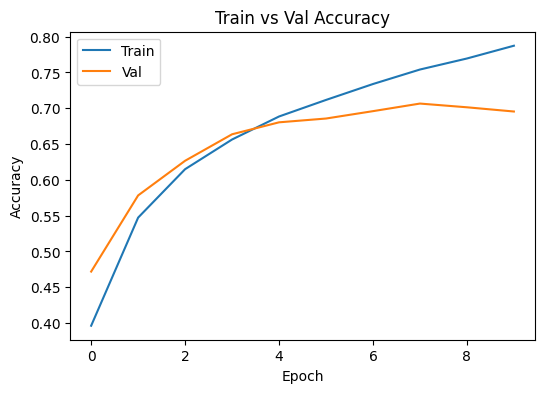

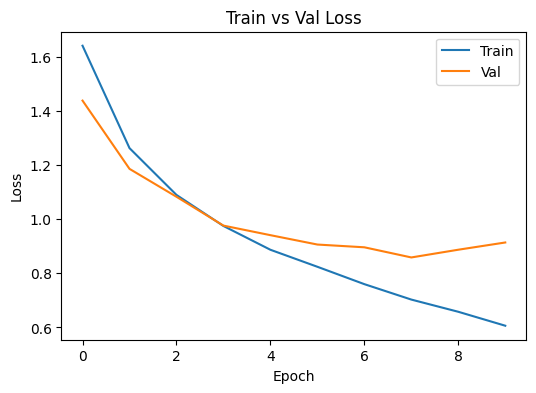

Not strong overfitting (gap is small).


In [17]:
import matplotlib.pyplot as plt

train_acc = history.history["accuracy"]
val_acc   = history.history["val_accuracy"]
train_loss = history.history["loss"]
val_loss   = history.history["val_loss"]

print("Last Train Acc:", train_acc[-1])
print("Last Val Acc:", val_acc[-1])
print("Last Train Loss:", train_loss[-1])
print("Last Val Loss:", val_loss[-1])

plt.figure(figsize=(6,4))
plt.plot(train_acc)
plt.plot(val_acc)
plt.title("Train vs Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Val"])
plt.show()

plt.figure(figsize=(6,4))
plt.plot(train_loss)
plt.plot(val_loss)
plt.title("Train vs Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Val"])
plt.show()

if train_acc[-1] - val_acc[-1] > 0.15:
    print("Likely Overfitting (train much higher than val).")
else:
    print("Not strong overfitting (gap is small).")

In [18]:
# =========================
# 5) Evaluate model
# =========================
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7031 - loss: 0.9109
Test accuracy: 0.6966000199317932


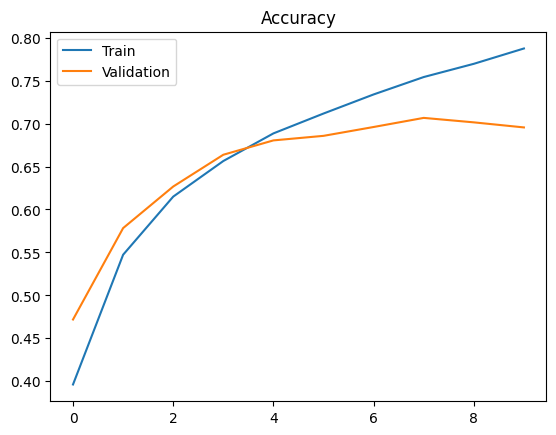

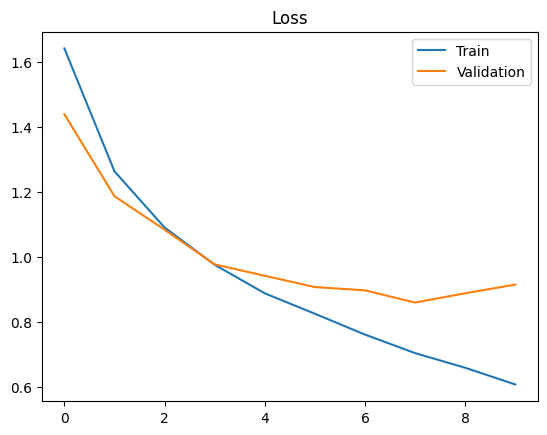

In [19]:
# =========================
# 6) Plot results
# =========================
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss")
plt.legend(["Train", "Validation"])
plt.show()

Classification Report:
              precision    recall  f1-score   support

    airplane       0.69      0.80      0.74      1000
  automobile       0.85      0.79      0.82      1000
        bird       0.78      0.43      0.55      1000
         cat       0.49      0.64      0.55      1000
        deer       0.61      0.67      0.64      1000
         dog       0.73      0.51      0.60      1000
        frog       0.81      0.72      0.76      1000
       horse       0.74      0.75      0.74      1000
        ship       0.72      0.83      0.77      1000
       truck       0.68      0.84      0.75      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.69     10000
weighted avg       0.71      0.70      0.69     10000



<Figure size 1000x800 with 0 Axes>

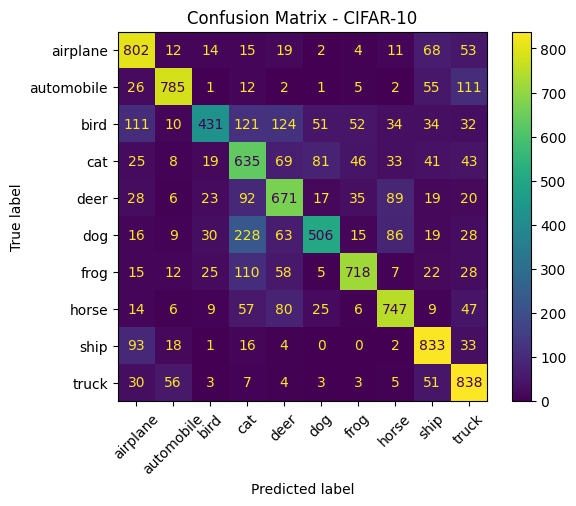

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# 1) Predict classes on test set
y_prob = model.predict(X_test, verbose=0)
y_pred = np.argmax(y_prob, axis=1)

# 2) Convert y_test from shape (N,1) to (N,)
y_true = y_test.reshape(-1)

# 3) Class names (CIFAR-10)
class_names = [
    "airplane","automobile","bird","cat","deer",
    "dog","frog","horse","ship","truck"
]

# 4) Classification report (Precision / Recall / F1)
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# 5) Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# 6) Plot confusion matrix (clear)
plt.figure(figsize=(10,8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(values_format="d", xticks_rotation=45)
plt.title("Confusion Matrix - CIFAR-10")
plt.show()

In [ ]:
# ============================================================
# CIFAR-10 CNN IMPROVED MODEL (Full code)
# What I improved (English):
# 1) Added Data Augmentation (flip, rotation, zoom) to improve generalization.
# 2) Added Batch Normalization after Conv layers for more stable training.
# 3) Added Dropout to reduce overfitting.
# 4) Used a deeper CNN (more Conv blocks) to learn better features.
# 5) Added EarlyStopping + ReduceLROnPlateau to stop at best epoch and lower LR when needed.
# ============================================================

import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# 1) Load CIFAR-10
# -----------------------------
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize images to [0,1]
X_train = X_train / 255.0
X_test  = X_test / 255.0

# -----------------------------
# 2) Data Augmentation
# -----------------------------
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.10),
    layers.RandomZoom(0.10),
])

# -----------------------------
# 3) Build Improved CNN
# -----------------------------
model = tf.keras.Sequential([
    layers.Input(shape=(32, 32, 3)),

    data_augmentation,

    # Block 1
    layers.Conv2D(32, (3,3), padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(32, (3,3), padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    # Block 2
    layers.Conv2D(64, (3,3), padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(64, (3,3), padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.30),

    # Block 3
    layers.Conv2D(128, (3,3), padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(128, (3,3), padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.35),

    # Classifier head
    layers.Flatten(),
    layers.Dense(256),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.5),

    layers.Dense(10, activation="softmax")
])

# -----------------------------
# 4) Compile
# -----------------------------
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# -----------------------------
# 5) Callbacks
# -----------------------------
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=2, factor=0.5)
]

# -----------------------------
# 6) Train
# -----------------------------
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=callbacks
)

# -----------------------------
# 7) Evaluate
# -----------------------------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", test_acc)

# -----------------------------
# 8) Plot Accuracy & Loss
# -----------------------------
plt.figure(figsize=(6,4))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

plt.figure(figsize=(6,4))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.show()

# -----------------------------
# 9) Confusion Matrix + Report (optional)
# -----------------------------
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

y_prob = model.predict(X_test, verbose=0)
y_pred = np.argmax(y_prob, axis=1)
y_true = y_test.reshape(-1)

class_names = [
    "airplane","automobile","bird","cat","deer",
    "dog","frog","horse","ship","truck"
]

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(values_format="d", xticks_rotation=45)
plt.title("Confusion Matrix - Improved CNN")
plt.show()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 816,938 (3.12 MB)

 Trainable params: 815,530 (3.11 MB)

 Non-trainable params: 1,408 (5.50 KB)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 394s 621ms/step - accuracy: 0.3062 - loss: 2.0252 - val_accuracy: 0.4095 - val_loss: 1.6960 - learning_rate: 0.0010
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 375s 601ms/step - accuracy: 0.4862 - loss: 1.4250 - val_accuracy: 0.5016 - val_loss: 1.4059 - learning_rate: 0.0010
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 374s 599ms/step - accuracy: 0.5462 - loss: 1.2568 - val_accuracy: 0.4301 - val_loss: 1.8633 - learning_rate: 0.0010
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 374s 599ms/step - accuracy: 0.5905 - loss: 1.1513 - val_accuracy: 0.6188 - val_loss: 1.1110 - learning_rate: 0.0010
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 383s 600ms/step - accuracy: 0.6196 - loss: 1.0753 - val_accuracy: 0.6396 - val_loss: 1.0342 - learning_rate: 0.0010
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 375s 600ms/step - accuracy: 0.6428 - loss: 1.0117 - val_accuracy: 0.6385 - val_loss: 1.0272 - learning_rate: 0.0010
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 385s 605ms/step - accura

In [24]:
import os

SAVE_DIR = "saved_models"
os.makedirs(SAVE_DIR, exist_ok=True)

MODEL_PATH = os.path.join(SAVE_DIR, "cifar10_cnn_improved.keras")  # أفضل صيغة
model.save(MODEL_PATH)

print("Model saved to:", MODEL_PATH)

Model saved to: saved_models/cifar10_cnn_improved.keras



Classification Report:
              precision    recall  f1-score   support

    airplane       0.82      0.83      0.82      1000
  automobile       0.86      0.95      0.90      1000
        bird       0.84      0.67      0.75      1000
         cat       0.74      0.60      0.66      1000
        deer       0.79      0.75      0.77      1000
         dog       0.81      0.69      0.75      1000
        frog       0.71      0.93      0.80      1000
       horse       0.82      0.86      0.84      1000
        ship       0.90      0.89      0.90      1000
       truck       0.80      0.90      0.84      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.80     10000
weighted avg       0.81      0.81      0.80     10000



<Figure size 1000x800 with 0 Axes>

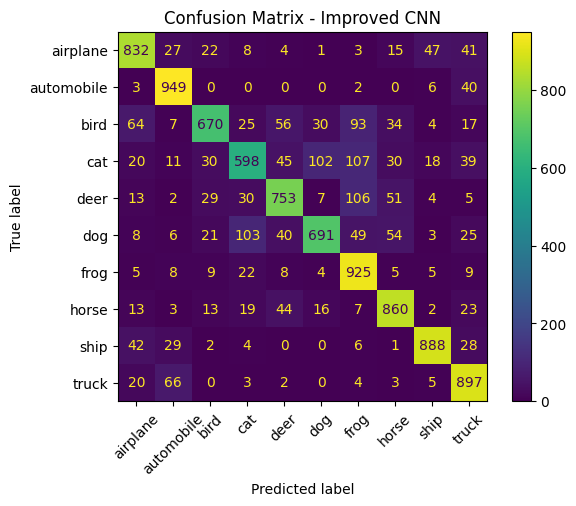

In [25]:
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(values_format="d", xticks_rotation=45)
plt.title("Confusion Matrix - Improved CNN")
plt.show()